In [155]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

In [156]:
# Mafaulda
# load data hasil ekstraksi fitur fft
x = pd.read_csv('D:\ITS\Tugas Akhir\data\DataFrame\Spectral\\fft_mafaulda.csv', header=None)
x = x.fillna(0)

# load label
y = pd.read_csv('D:\ITS\Tugas Akhir\data\DataFrame\Spectral\\label_mafaulda.csv', header=None)

In [146]:
x = pd.read_csv('D:\ITS\Tugas Akhir\data\DataFrame\Spectral\\fft_mafaulda.csv', usecols = [9,10,11,12,13,14,21,22,23], header=None) # read the csv file

In [157]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [158]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (1560, 27)
Shape of Test Data : (391, 27)


In [ ]:
## kNN Machine Learning
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
## SVM Machine Learning
#Setup arrays to store training and test accuracies
c_svm = np.arange(1,100)
train_accuracy =np.empty(len(c_svm))
test_accuracy = np.empty(len(c_svm))
for i,k in enumerate(c_svm):
    #Setup a knn classifier with c_svm
    svm = SVC(C=k)
    #Fit the model
    svm.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = svm.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = svm.score(X_test, y_test) 
    
#Generate plot
plt.title('C Varying number of SVM')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of SVM')
plt.ylabel('Accuracy')
plt.show()

In [180]:
# kNN
knn = KNeighborsClassifier(n_neighbors = 30) #n_neighbors = k
outknn = knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(57,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(57,knn.score(X_test,y_test)))

## SVM Machine Learning
svm = SVC(C=1, kernel='rbf', class_weight='balanced', random_state = None)
clf = svm.fit(X_train,y_train)
print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train,y_train)))
print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test,y_test)))

# Naive Bayes
gnb= GaussianNB(var_smoothing=1e-9)
outgnb = gnb.fit(X_train,y_train)

print("NB accuracy is {} on Train Dataset".format(gnb.score(X_train,y_train)))
print("NB accuracy is {} on Test Dataset".format(gnb.score(X_test,y_test)))

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=57NN Accuracy on Train Data: 0.9724358974358974
k=57NN Accuracy on Test Data: 0.989769820971867


C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM accuracy is 0.9673076923076923 on Train Dataset
SVM accuracy is 0.9667519181585678 on Test Dataset
NB accuracy is 0.9288461538461539 on Train Dataset
NB accuracy is 0.9156010230179028 on Test Dataset


C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


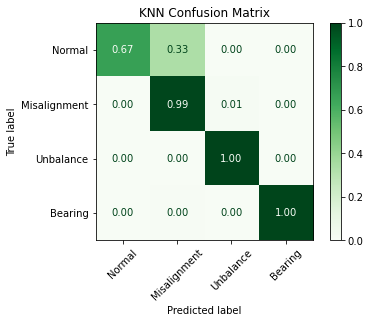

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


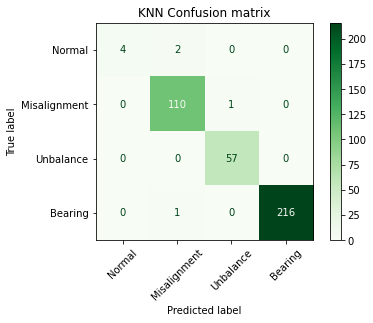

              precision    recall  f1-score   support

      Normal     1.0000    0.6667    0.8000         6
Misalignment     0.9735    0.9910    0.9821       111
   Unbalance     0.9828    1.0000    0.9913        57
     Bearing     1.0000    0.9954    0.9977       217

    accuracy                         0.9898       391
   macro avg     0.9891    0.9133    0.9428       391
weighted avg     0.9899    0.9898    0.9893       391



In [181]:
# Generate confusion matrix KNN
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,values_format='.2f',
                                 normalize='true')
plt.title('KNN Confusion Matrix')
plt.show(matrix_1)
matrix_2 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('KNN Confusion matrix')
plt.show(matrix_2)
plt.show()
print(classification_report(y_true=y_test, y_pred= outknn.predict(X_test), target_names=class_names, digits=4))

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


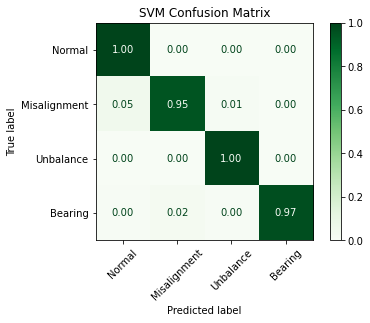

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


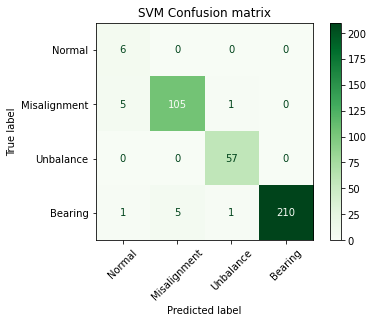

              precision    recall  f1-score   support

      Normal     0.5000    1.0000    0.6667         6
Misalignment     0.9545    0.9459    0.9502       111
   Unbalance     0.9661    1.0000    0.9828        57
     Bearing     1.0000    0.9677    0.9836       217

    accuracy                         0.9668       391
   macro avg     0.8552    0.9784    0.8958       391
weighted avg     0.9745    0.9668    0.9691       391



In [161]:
# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,values_format='.2f',
                                 normalize='true')
plt.title('SVM Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('SVM Confusion matrix')
plt.show(matrix_2)

plt.show()

print(classification_report(y_true=y_test, y_pred= clf.predict(X_test), target_names=class_names,digits=4))

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


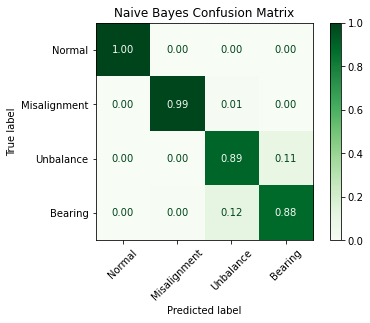

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


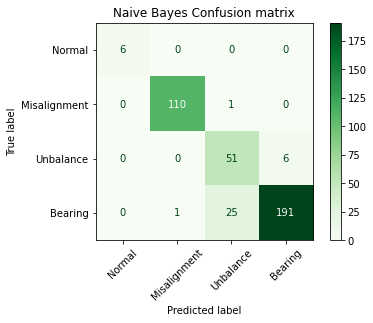

              precision    recall  f1-score   support

      Normal     1.0000    1.0000    1.0000         6
Misalignment     0.9910    0.9910    0.9910       111
   Unbalance     0.6623    0.8947    0.7612        57
     Bearing     0.9695    0.8802    0.9227       217

    accuracy                         0.9156       391
   macro avg     0.9057    0.9415    0.9187       391
weighted avg     0.9313    0.9156    0.9197       391



In [162]:
# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(gnb, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,values_format='.2f',
                                 normalize='true')
plt.title('Naive Bayes Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(gnb, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('Naive Bayes Confusion matrix')
plt.show(matrix_2)

plt.show()

print(classification_report(y_true=y_test, y_pred= gnb.predict(X_test), target_names=class_names,digits=4))

<function matplotlib.pyplot.show(close=None, block=None)>

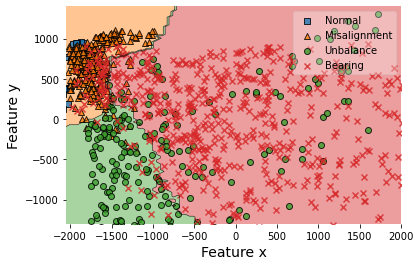

In [100]:
# Plot Decision Boundary kNN
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
knn.fit(X_train2, y_train)

y_train= np.ndarray.flatten(np.array(y_train))
ax = plot_decision_regions(X_train2, y_train, knn, legend=4)
plt.xlabel(y.columns[0], size=14)
plt.ylabel(x.columns[1], size=14)
#plt.title('kNN Decision Region Boundary', size=16)
plt.xlim(-2050,2000)
plt.ylim(-1300,1400)
plt.xlabel('Feature x')
plt.ylabel('Feature y')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Normal', 'Misalignment', 'Unbalance', 'Bearing'], 
           framealpha=0.3, scatterpoints=1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

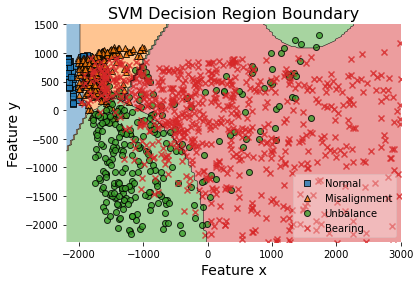

In [101]:
# Plot Decision Boundary SVM
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
svm.fit(X_train2, y_train)

y_train= np.ndarray.flatten(np.array(y_train))
ax = plot_decision_regions(X_train2, y_train, svm, legend=4)
plt.xlabel(y.columns[0], size=14)
plt.ylabel(x.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.xlim(-2200,3000)
plt.ylim(-2300,1500)
plt.xlabel('Feature x')
plt.ylabel('Feature y')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Normal', 'Misalignment', 'Unbalance', 'Bearing'], 
           framealpha=0.3, scatterpoints=1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

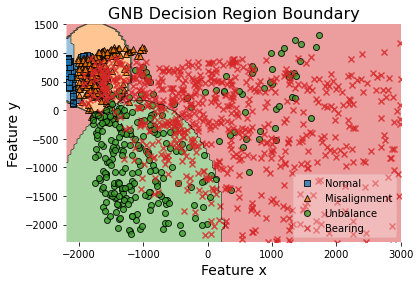

In [102]:
# Plot Decision Boundary GNB
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
gnb.fit(X_train2, y_train)

y_train= np.ndarray.flatten(np.array(y_train))
ax = plot_decision_regions(X_train2, y_train, gnb, legend=4)
plt.xlabel(y.columns[0], size=14)
plt.ylabel(x.columns[1], size=14)
plt.title('GNB Decision Region Boundary', size=16)
plt.xlim(-2200,3000)
plt.ylim(-2300,1500)
plt.xlabel('Feature x')
plt.ylabel('Feature y')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Normal', 'Misalignment', 'Unbalance', 'Bearing'], 
           framealpha=0.3, scatterpoints=1)
plt.show

Feature: 0, Score: 0.04381
Feature: 1, Score: 0.02452
Feature: 2, Score: 0.02464
Feature: 3, Score: 0.00244
Feature: 4, Score: 0.00330
Feature: 5, Score: 0.00233
Feature: 6, Score: 0.00462
Feature: 7, Score: 0.00673
Feature: 8, Score: 0.00776
Feature: 9, Score: 0.05785
Feature: 10, Score: 0.03724
Feature: 11, Score: 0.01745
Feature: 12, Score: 0.22492
Feature: 13, Score: 0.11149
Feature: 14, Score: 0.07887
Feature: 15, Score: 0.02912
Feature: 16, Score: 0.03529
Feature: 17, Score: 0.02299
Feature: 18, Score: 0.01098
Feature: 19, Score: 0.01322
Feature: 20, Score: 0.00951
Feature: 21, Score: 0.14114
Feature: 22, Score: 0.02442
Feature: 23, Score: 0.03384
Feature: 24, Score: 0.00422
Feature: 25, Score: 0.00940
Feature: 26, Score: 0.01788


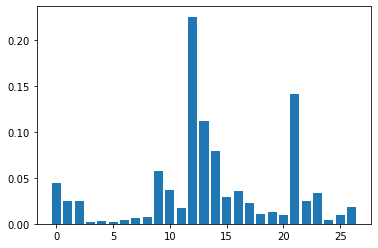

In [23]:
# linear regression feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define dataset
def f(x):
    return int(x)
f2 = np.vectorize(f)
x = np.array(x)

def fy(y):
    return int(y)
f2 = np.vectorize(fy)
y = np.array(y)
y = y.flatten()

#model = LinearRegression()
model = RandomForestClassifier()
#model = DecisionTreeClassifier()
#model = KNeighborsClassifier()
# fit the model
model.fit(x,y)

# perform permutation importance
results = permutation_importance(model, x, y, scoring='accuracy')
# get importance
#importance = results.importances_mean

# get importance
importance = model.feature_importances_
#importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()